In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics /Project 1 /laptop_price.csv" , encoding = 'latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [53]:
df.shape

(1303, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


#DATA CLEANING

In [55]:
#dropping the columns which are not reuired
df.drop(columns=['laptop_ID','Product'],inplace=True)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [56]:
#checking the missing values
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [57]:
#check the duplicate values
df.duplicated().sum()

29

In [58]:
#dropping the duplicates value
df.drop_duplicates(inplace=True)

In [59]:
df.duplicated().sum()

0

In [60]:
df.shape

(1274, 11)

In [61]:
#89.48 inr = 1 euro
df['Price_euros'] = round(df['Price_euros']*89.48).astype(int)

In [62]:
df['Price_euros']

,Price_euros
0,119875
1,80437
2,51451
3,227051
4,161386
...,...
1269,64454
1270,57088
1271,134131
1272,20491


In [63]:
df.rename(columns = {'Price_euros':'Price'},inplace = True)

In [64]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119875
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80437
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51451
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227051
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161386


In [65]:
df[df['Ram']=='64GB'] #this is not running

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,355683


In [66]:
df['Ram'] = df['Ram'].apply(lambda a : a.replace("GB","")).astype(int)

In [67]:
df['Weight'] = df['Weight'].apply(lambda a : a.replace("kg","")).astype(float)

In [68]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119875
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80437
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51451
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227051
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161386


<Axes: xlabel='Ram', ylabel='Price'>

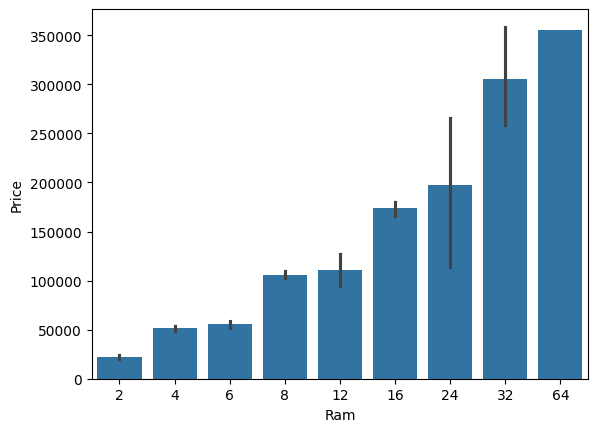

In [69]:
df['Ram'].value_counts
sns.barplot(x = df['Ram'],y = df['Price'])

doc:-as the Ram icreases the price also increases

In [70]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


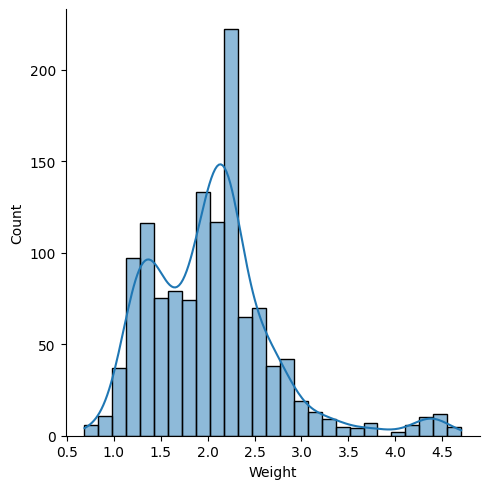

In [71]:
sns.displot(x = df['Weight'],kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

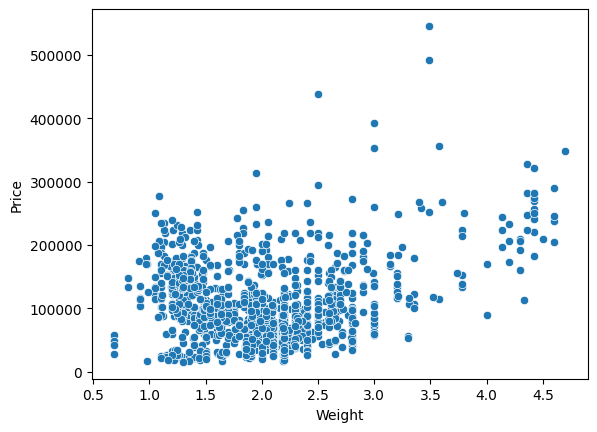

In [72]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

In [73]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [74]:
#filterinf the companies which sold less than 10 laptops
df = df[df.groupby('Company')['Company'].transform('count')>10]

In [75]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


<Axes: xlabel='Company', ylabel='Price'>

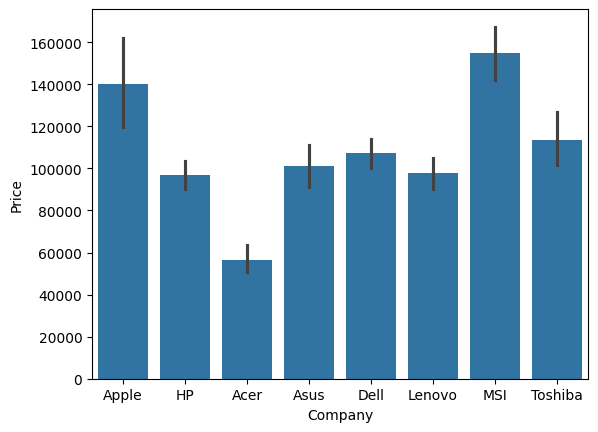

In [76]:
sns.barplot(x = df['Company'], y = df['Price'])

In [77]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

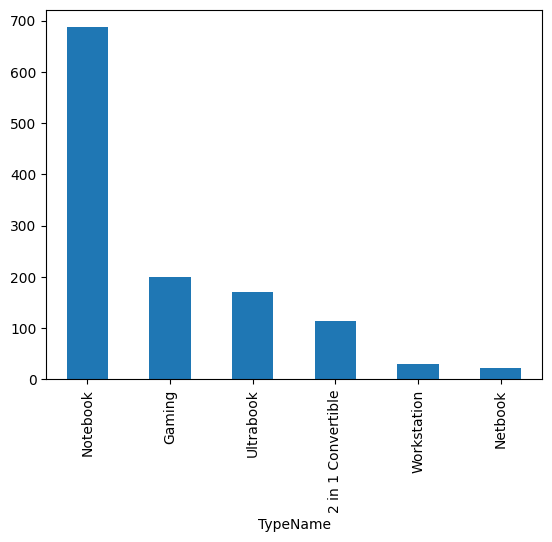

In [78]:
df['TypeName'].value_counts().plot(kind = 'bar')

<ipython-input-79-e05712e7ac6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['TypeName'], y = df['Price'], palette = 'viridis')


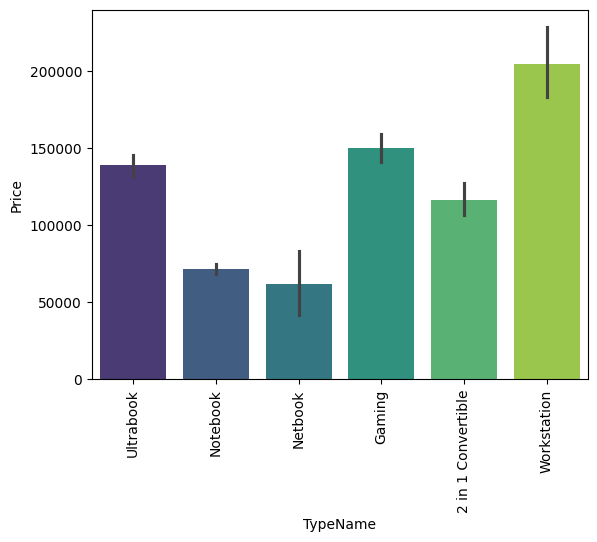

In [79]:
sns.barplot(x = df['TypeName'], y = df['Price'], palette = 'viridis')
plt.xticks(rotation = 90)
plt.show()

In [80]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [81]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [82]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<ipython-input-83-68aa6282ad98>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


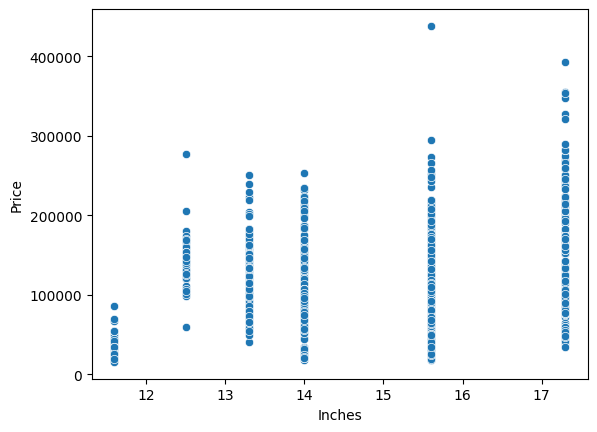

In [83]:
sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

<ipython-input-84-02077d189f4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


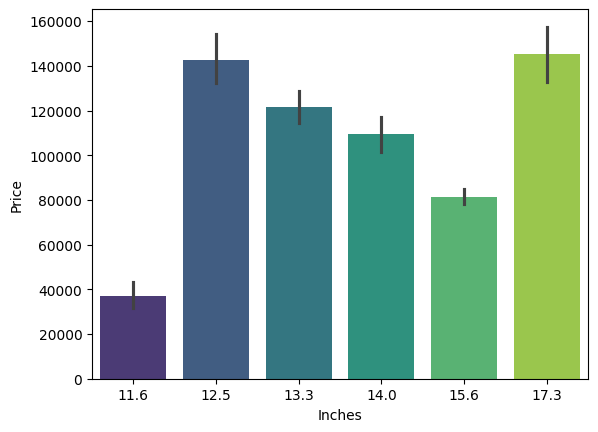

In [84]:
sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

In [85]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


#PPI
Pixels per inch (PPI) refers to the number of pixels contained within each inch of a digital image. It also refers to the set number of pixels a screen can display. Generally speaking, the higher the PPI, the better the image quality.

In [86]:
df['X_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[0])).astype('int')

In [87]:
df['Y_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[1])).astype('int')

In [88]:
df['ppi'] = round(((df['X_res']**2) + (df['Y_res']**2))**0.5 /df['Inches'],2)

In [89]:
#Ppi vs Price  Analysis
df['ppi'].value_counts()

,count
ppi,
141.21,419
100.45,194
127.34,131
157.35,122
165.63,100
111.94,42
135.09,28
276.05,25
176.23,25


<Axes: xlabel='ppi', ylabel='Price'>

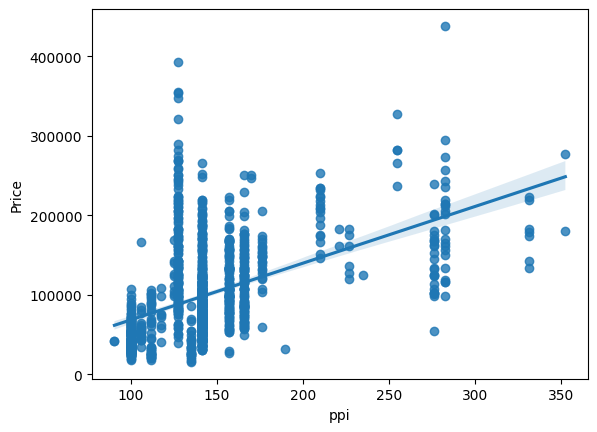

In [90]:
sns.regplot(x = df['ppi'] , y = df['Price'])

Doc:-The graph shows increase in the price with increasing ppi values

In [91]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#If there is IPS in this str return 1 else 0
(lambda a: 1 if "IPS" in a else 0)(' Panel Full HD IPS / Touchscreen 1920x1080')

1

In [92]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
1013,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.54,168868,1920,1080,157.35
785,MSI,Gaming,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,169207,1920,1080,157.35
1019,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,199451,1920,1080,157.35
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,57179,1920,1080,165.63
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,30334,1366,768,100.45


Doc:- The graph shows that the laptops without IPS has been purchased more than the IPS ones

In [93]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
1133,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,67289,1920,1080,141.21
462,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,67021,1920,1080,141.21
577,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,238285,1920,1080,127.34


In [94]:
df['Touchscreen'] =  df['ScreenResolution'].apply(lambda a: 1 if "Touchscreen" in a else 0)

<Axes: xlabel='Touchscreen'>

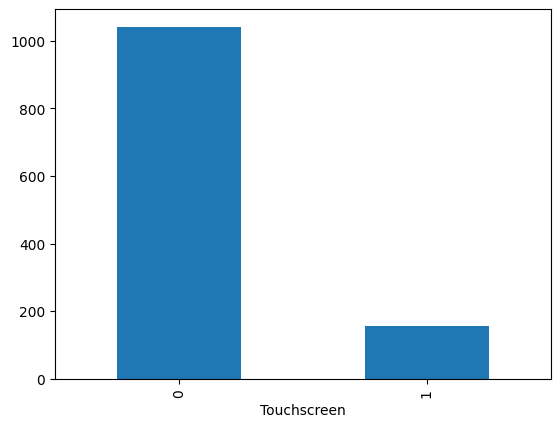

In [95]:
df['Touchscreen'].value_counts().plot(kind ='bar')

Doc:- The graph shows that the laptops without touchscreen has been purchased more than the touchsreen ones

In [96]:
df['IPS'] =  df['ScreenResolution'].apply(lambda a: 1 if "IPS" in a else 0)

<Axes: xlabel='IPS'>

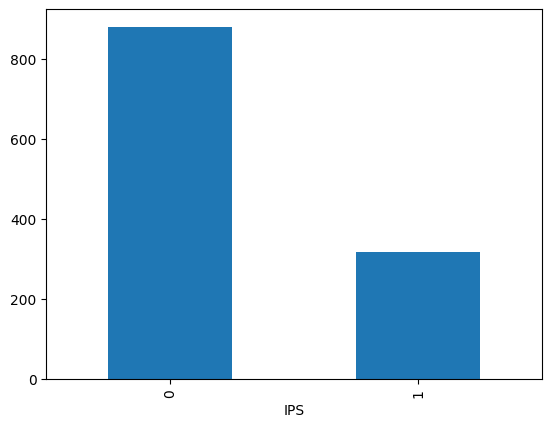

In [97]:
df['IPS'].value_counts().plot(kind ='bar')

In [103]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace = True)

In [98]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


<Axes: xlabel='Cpu'>

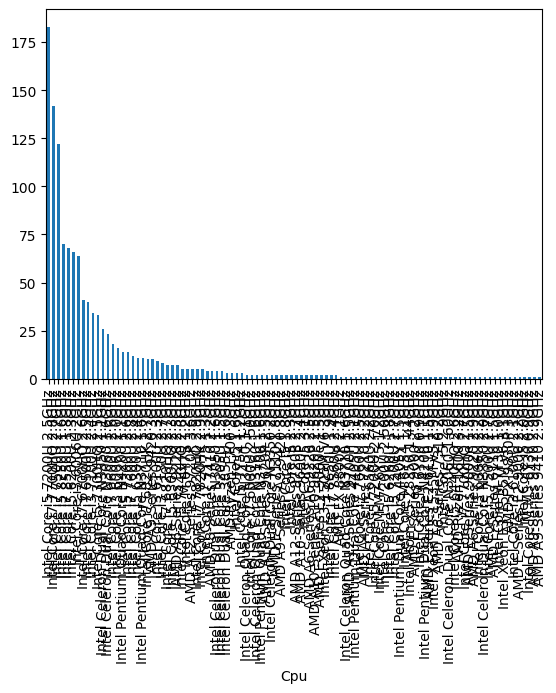

In [99]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [100]:
df['Cpu'] = df['Cpu'].apply(lambda a :" ".join(a.split()[0:3]))

In [101]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [104]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text =='Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return "Other Intel Processor"
  else:
    if text[4] == 'E':
      return "AMD E-Series"
    elif text[4] == 'A':
      return "AMD A-Series"
    elif text[4] == 'F':
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"

In [105]:
fetch_pro('Intel Core i5')

'Intel Core i5'

In [106]:
df['Cpu'] = df['Cpu'].apply(fetch_pro)

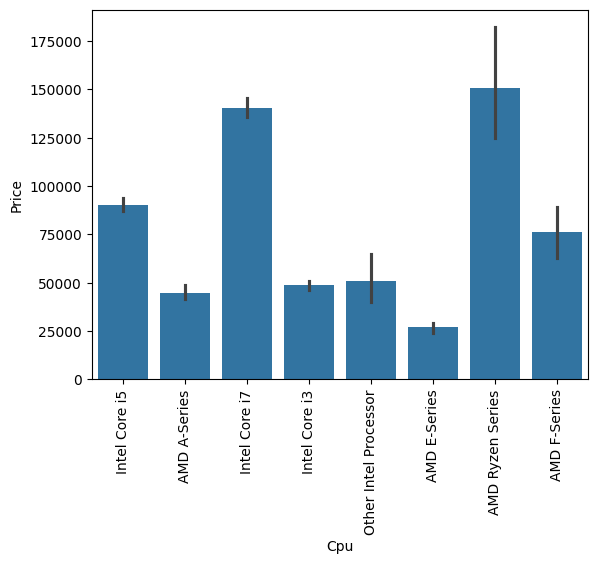

In [107]:
sns.barplot(x = df['Cpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

Doc:- By the above graph we understood that AMD ryzen series were purchased more followed by the intel icore7 and the least wasAMD E-series

In [108]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,262
Intel HD Graphics 520,179
Nvidia GeForce GTX 1050,65
Intel UHD Graphics 620,64
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [110]:
df['Gpu'] = df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [112]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


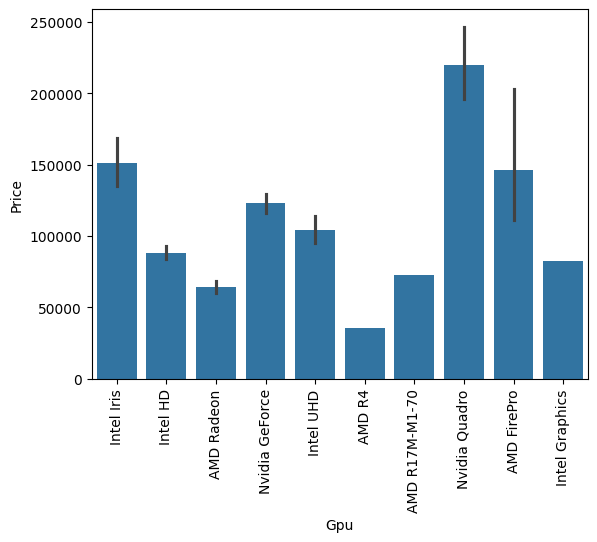

In [113]:
sns.barplot(x = df['Gpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

Doc:- By the above graph we conclude that Nividia Quandro follwed by Intel Iris and the least AMD R4

In [114]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


Wherever we have Windows 10 or Window 10 S >>> Windows 10
Windows 7 >> Windows 7
Mac OS X	or macOS >>  mac OS
No OS >> No OS
Linux >> Linux
Chrome OS >>> Chrome OS

In [115]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'macOS'  or text == 'Mac OS X':
    return 'mac OS'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return "Linux"
  else:
    return "Chrome OS"

In [117]:
df['OpSys'] =  df['OpSys'].apply(os)

In [118]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


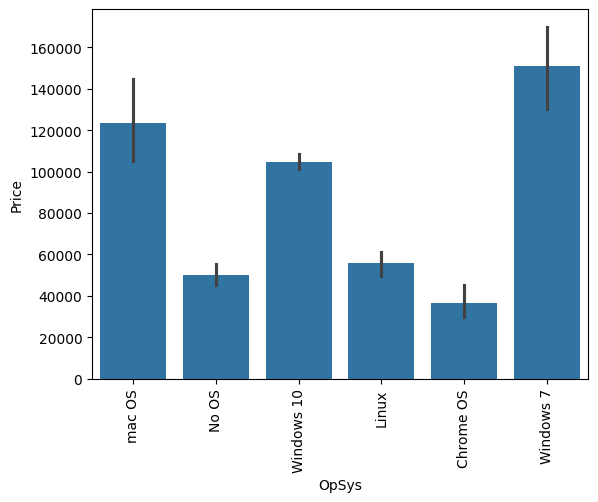

In [119]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [120]:
df[df['OpSys'] == 'Windows 10']['Price'].describe()

,Price
count,999.00000
mean,104780.40040
std,58894.05625
min,17171.00000
25%,60399.00000
50%,92970.00000
75%,134175.50000
max,438363.00000


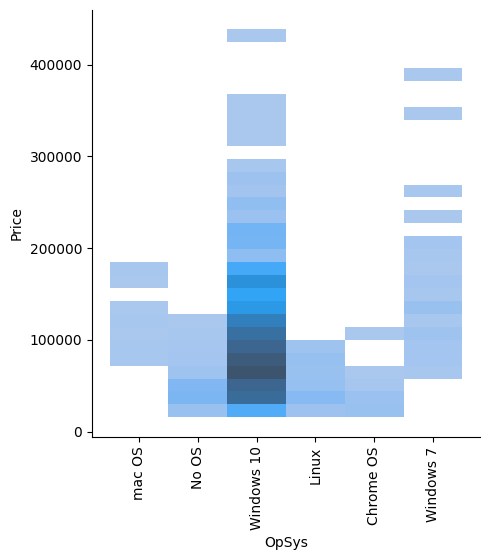

In [122]:
sns.displot(data = df , x = 'OpSys' , y = 'Price' )
plt.xticks(rotation = 90)
plt.show()

Now for SSD,HDD,Hybrid,Flash Storage

In [124]:
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0) #
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']

df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-124-42fb1b8b685b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0",inplace=True)


In [126]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
1267,Dell,Notebook,Intel Core i7,8,1TB HDD,AMD Radeon,Linux,2.30,72120,100.45,0,0,1,0,0,0
684,Lenovo,2 in 1 Convertible,Intel Core i7,8,512GB SSD,Intel UHD,Windows 10,1.19,134131,165.63,1,1,0,512,0,0
1143,HP,Workstation,Intel Core i7,8,256GB SSD,Nvidia Quadro,Windows 7,2.59,199451,141.21,0,1,0,256,0,0
400,Lenovo,Notebook,Other Intel Processor,4,1TB HDD,Intel HD,Windows 10,2.20,27381,100.45,0,0,1,0,0,0
439,Asus,Notebook,Intel Core i5,4,256GB SSD,Intel HD,Linux,2.00,50019,141.21,0,0,0,256,0,0


In [128]:
df.to_csv("Cleaned_Laptop.csv")